# Installing Packages

In [2]:
# %pip install librosa
# %pip install numpy
# %pip install matplotlib
# Pre installed these packages


# Importing Packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [7]:
ipd.Audio("Lab_01.wav")

A1. Load the recorded speech file into your python workspace. Once loaded, plot the graph for the 
speech signal.

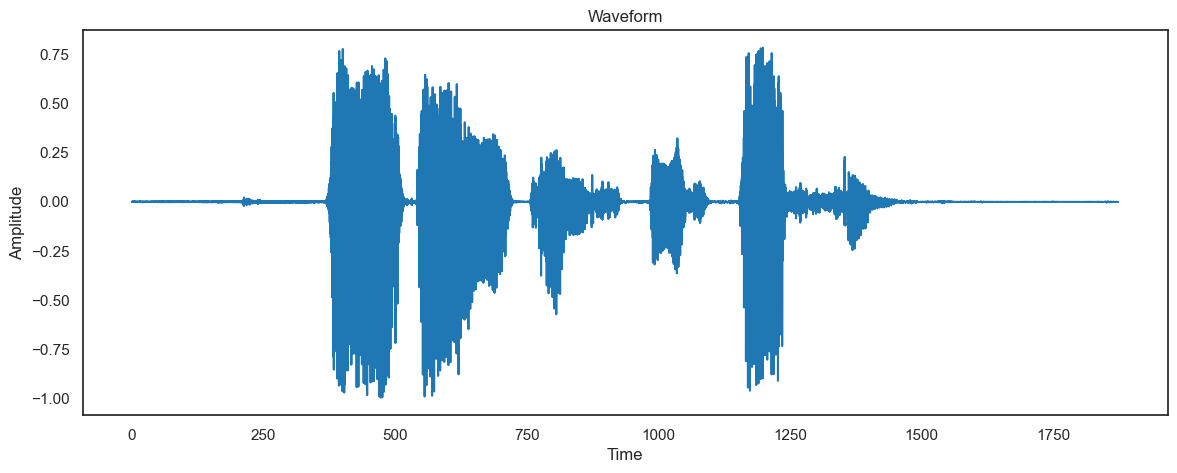

In [91]:
filename = "Lab_01.wav"
y, sr = librosa.load(filename)

# Plot the waveform using matplotlib
plt.figure(figsize=(14, 5))
plt.plot(librosa.times_like(y), y)
# plt.plot(y)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

A2. Observe the length & magnitude range of the signal from the plot. Observing the plot, relate to
the spoken words and silence between the words

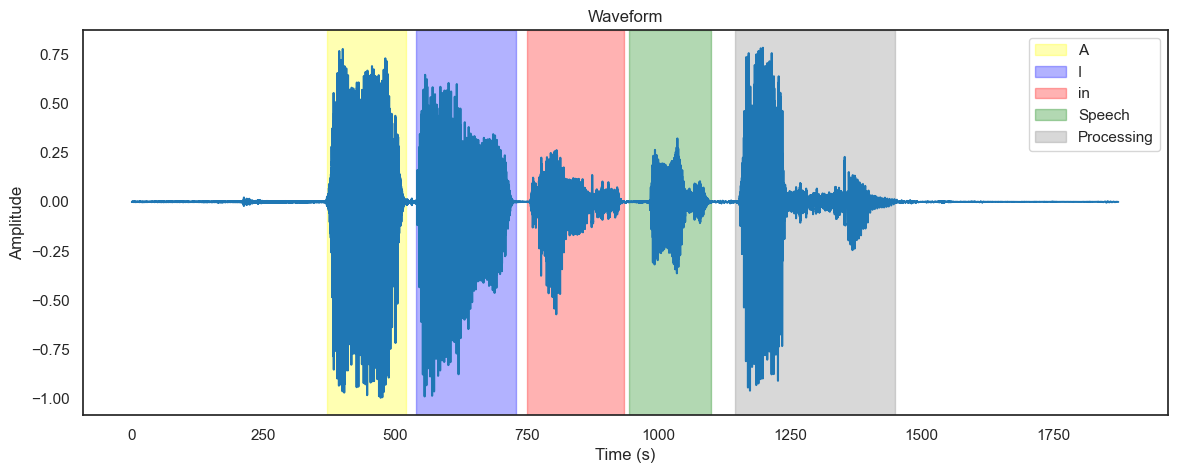

Signal Length: 3.66 seconds
Magnitude Range: 0.99 dB


In [112]:
# Plot the waveform using matplotlib
plt.figure(figsize=(14, 5))
plt.plot(librosa.times_like(y), y)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Calculate the length of the signal in seconds
length_seconds = len(y) / sr

# Calculate the magnitude range of the signal
magnitude_range = librosa.db_to_amplitude(np.max(librosa.amplitude_to_db(np.abs(y))))


# Adding labels for spoken words and silence based on observations
plt.axvspan(xmin=370, xmax=520, color='yellow', alpha=0.3, label='A')

plt.axvspan(xmin=540, xmax=730, color='blue', alpha=0.3, label='I')

plt.axvspan(xmin=750, xmax=935, color='red', alpha=0.3, label='in')

plt.axvspan(xmin=945, xmax=1100, color='green', alpha=0.3, label='Speech')

plt.axvspan(xmin=1145, xmax=1450, color='grey', alpha=0.3, label='Processing')
plt.legend()
plt.show()

# Print the calculated values
print(f"Signal Length: {length_seconds:.2f} seconds")
print(f"Magnitude Range: {np.max(magnitude_range):.2f} dB")


The non-highlighted regions in the above graph point to the silent regions

In [80]:
# y, sr = librosa.load(filename)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 3.6749407e-04  4.8079714e-04  9.1757000e-05 -2.4800070e-04
 -5.4384413e-04 -6.5734482e-04 -5.7464949e-04 -3.3182855e-04
 -1.8386202e-04  9.1896320e-05]
shape y: (80703,)
sr: 22050


A3. Take a small segment of the signal and play it. 

Audio for 'A'

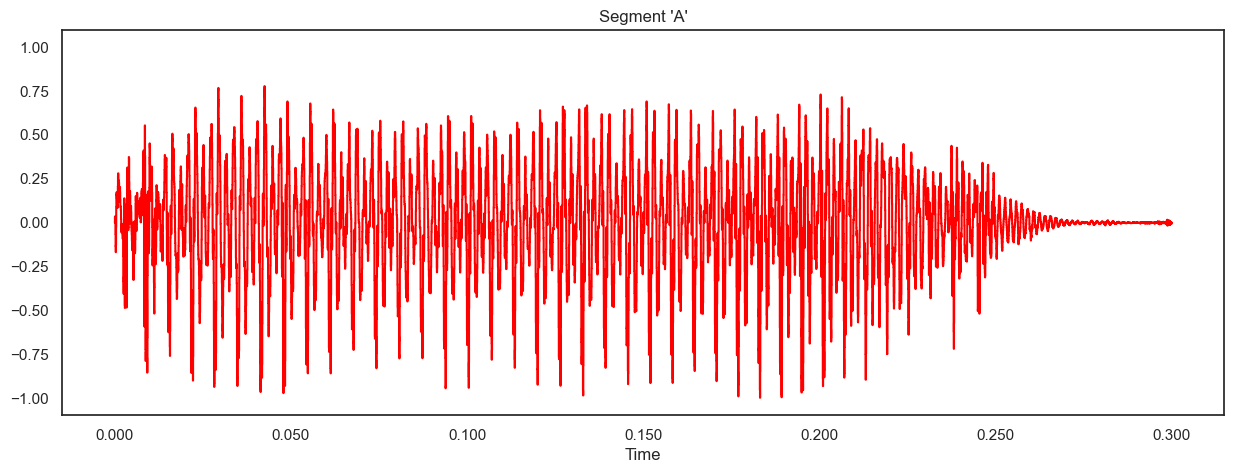

In [119]:
import IPython.display as ip

# Audio for 'A'
start = int(370/500*sr)
end = int(520/500*sr)
segment_A = y[start:end]
plt.figure(figsize=(15,5))
librosa.display.waveshow(segment_A,color='red')
plt.title("Segment 'A'")
plt.show()
ip.Audio(segment_A, rate=sr)

Audio for 'I'

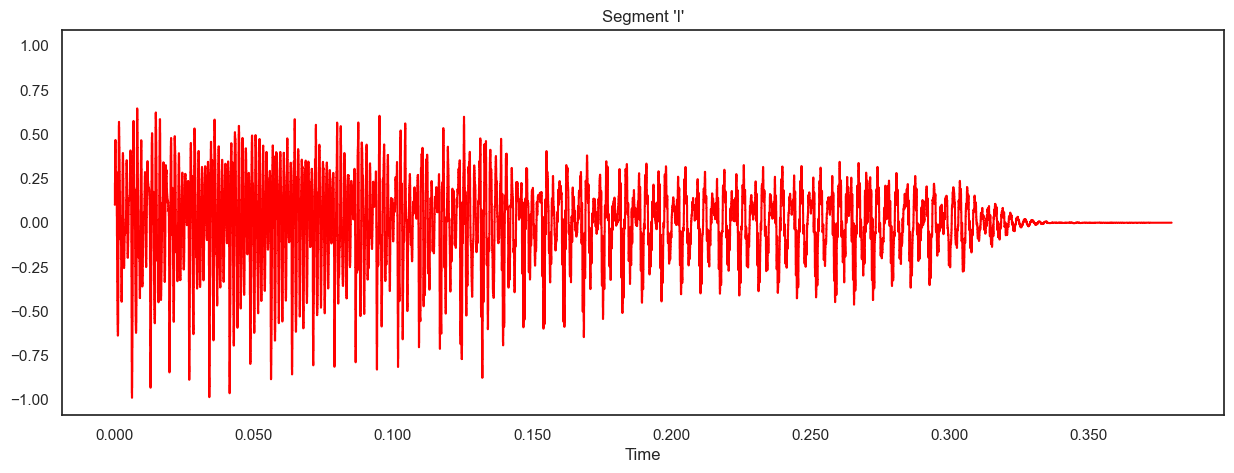

In [118]:
import IPython.display as ip

# Audio for 'I'
start = int(540/500*sr)
end = int(730/500*sr)
segment_I = y[start:end]
plt.figure(figsize=(15,5))
librosa.display.waveshow(segment_I,color='red')
plt.title("Segment 'I'")
plt.show()
ip.Audio(segment_I, rate=sr)

Audio for 'in'

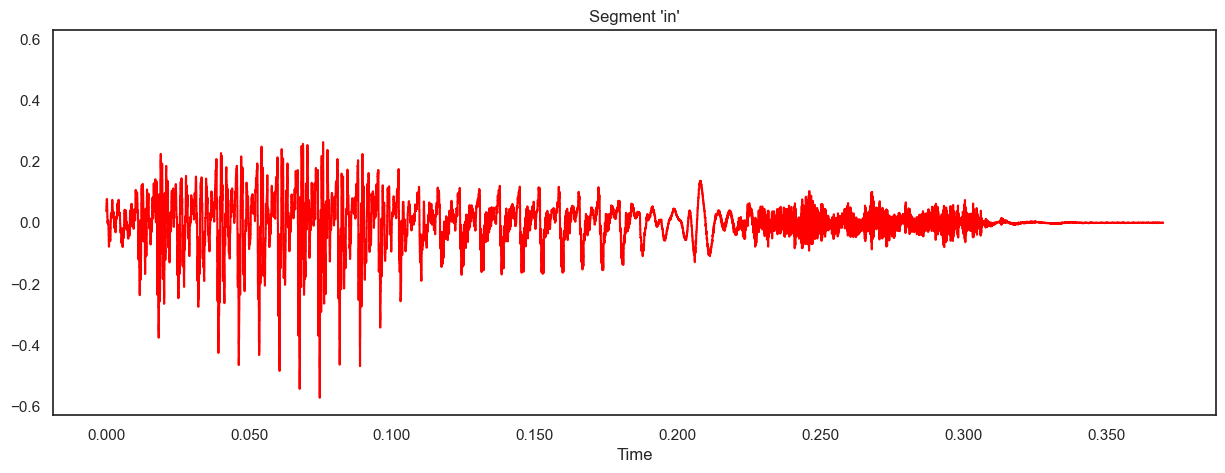

In [117]:
import IPython.display as ip

# Audio for 'in'
start = int(750/500*sr)
end = int(935/500*sr)
segment_in = y[start:end]
plt.figure(figsize=(15,5))
librosa.display.waveshow(segment_in,color='red')
plt.title("Segment 'in'")
plt.show()
ip.Audio(segment_in, rate=sr)

Audio for 'Speech'

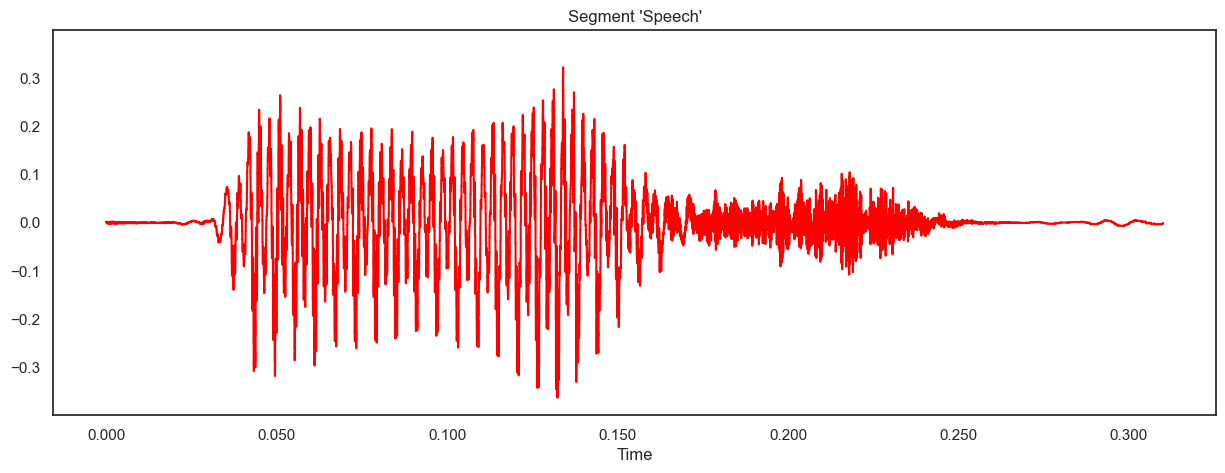

In [116]:
import IPython.display as ip

# Audio for 'I'
start = int(945/500*sr)
end = int(1100/500*sr)
segment_Speech = y[start:end]
plt.figure(figsize=(15,5))
librosa.display.waveshow(segment_Speech,color='red')
plt.title("Segment 'Speech'")
plt.show()
ip.Audio(segment_Speech, rate=sr)

Audio for 'Processing'

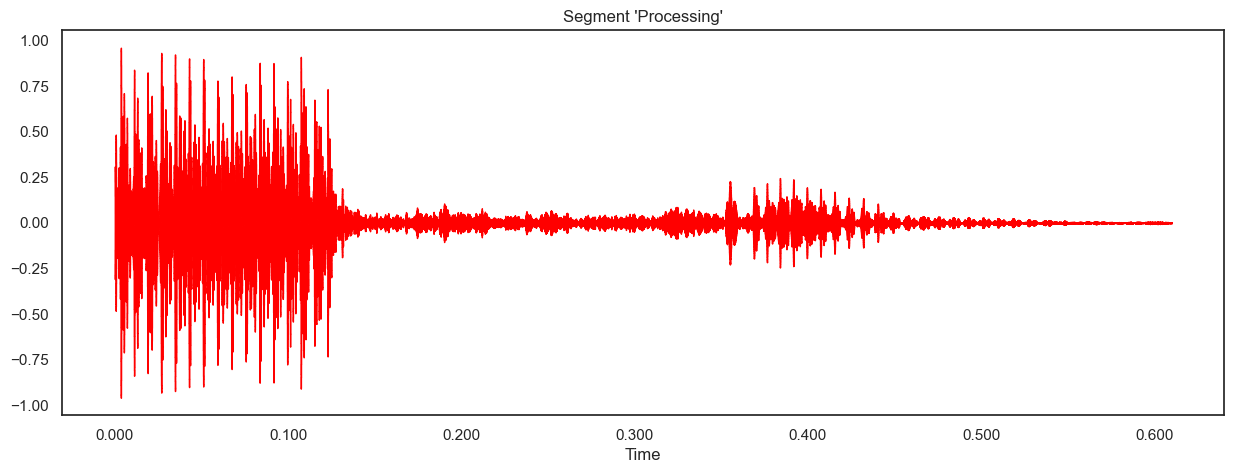

In [115]:
import IPython.display as ip

# Audio for 'Processing'
start = int(1145/500*sr)
end = int(1450/500*sr)
segment_Processing = y[start:end]
plt.figure(figsize=(15,5))
librosa.display.waveshow(segment_Processing,color='red')
plt.title("Segment 'Processing'")
plt.show()
ip.Audio(segment_Processing, rate=sr)

Trimminng the slient zones using inbuilt librosa package

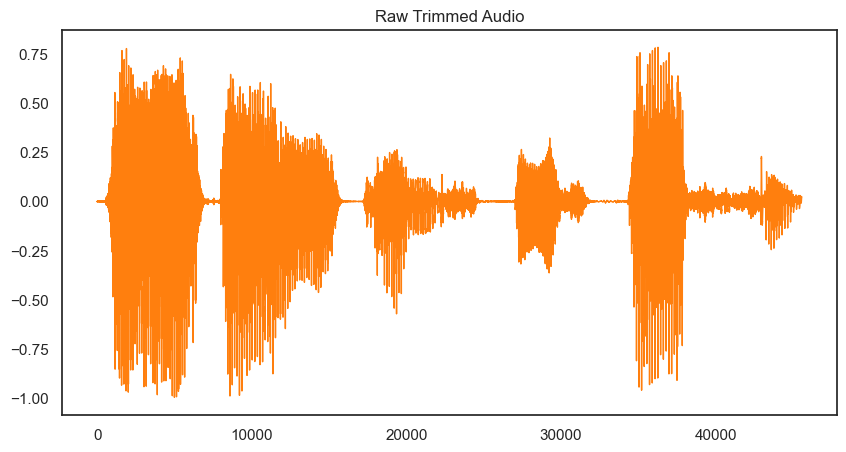

In [83]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),lw=1,title='Raw Trimmed Audio',color=color_pal[1])
plt.show()

Zooming the audio

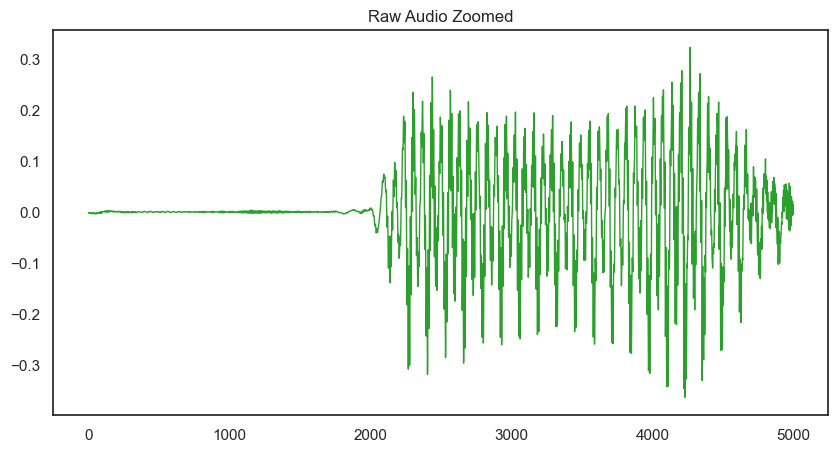

In [31]:
pd.Series(y_trimmed[25000:30000]).plot(figsize=(10, 5),lw=1,title='Raw Audio Zoomed',color=color_pal[2])
plt.show()

A4. Play around with your recorded speech signal for various segments. Understand the nature of 
the signal. Also observe with abruptly segmented speech, how the perception of that speech is 
affected.

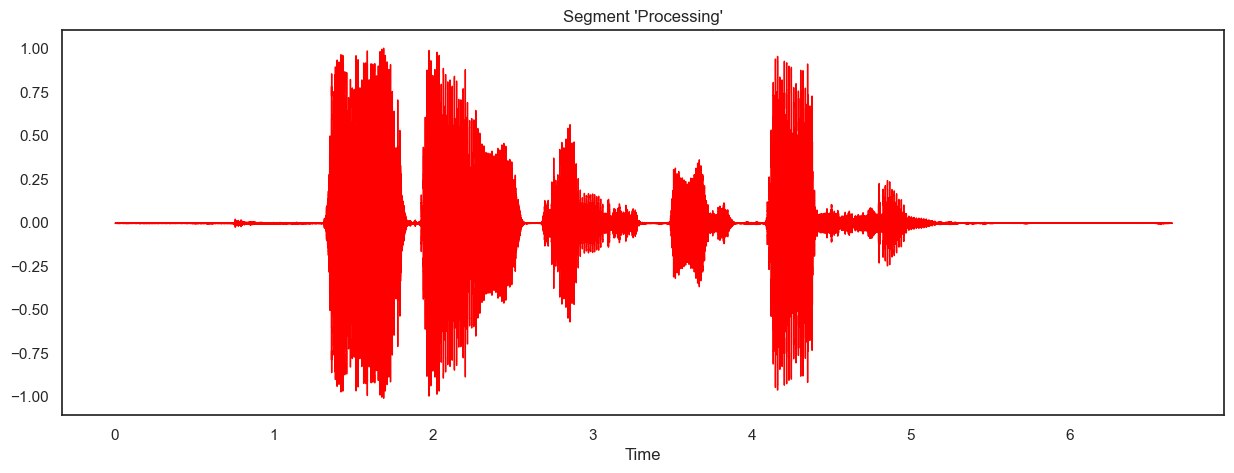

In [140]:
# original sr = 22050
target_sr = 40000
# specify the target sampling rate
resampled_A = librosa.resample(y, orig_sr=sr,target_sr=40000)

plt.figure(figsize=(15,5))
librosa.display.waveshow(resampled_A,color='red')
plt.title("Segment 'Processing'")
plt.show()
ip.Audio(resampled_A, rate=target_sr)


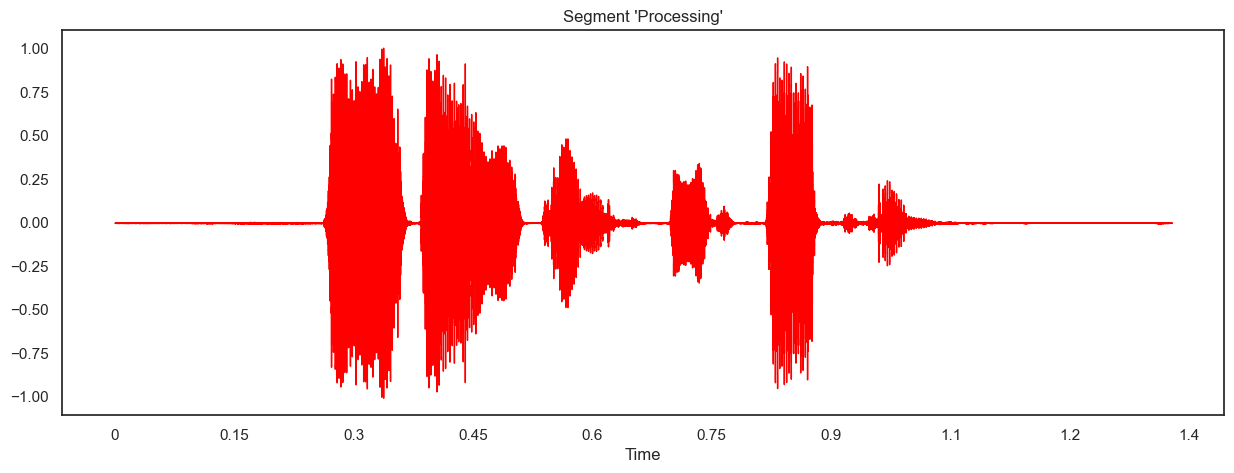

In [134]:
# original sr = 22050
resampled_A = librosa.resample(y, orig_sr=sr,target_sr=8000)

plt.figure(figsize=(15,5))
librosa.display.waveshow(resampled_A,color='red')
plt.title("Segment 'Processing'")
plt.show()
ip.Audio(resampled_A, rate=target_sr)


# Spectogram

In [22]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 158)

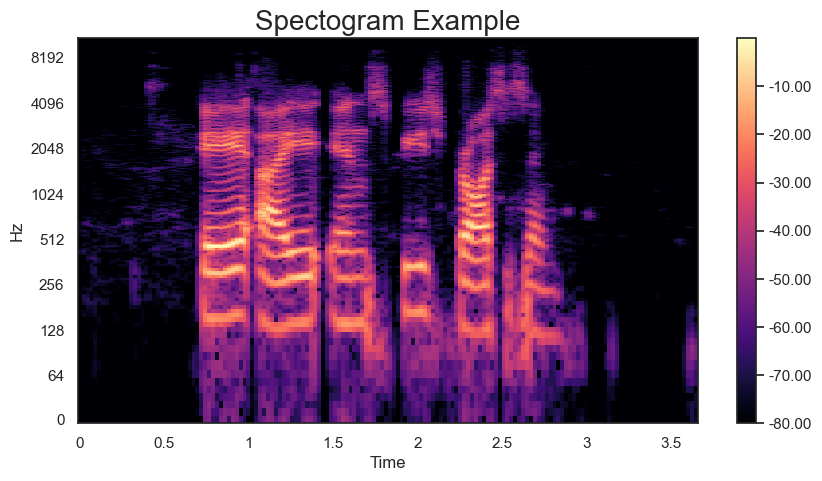

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectogram

In [24]:
S = librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

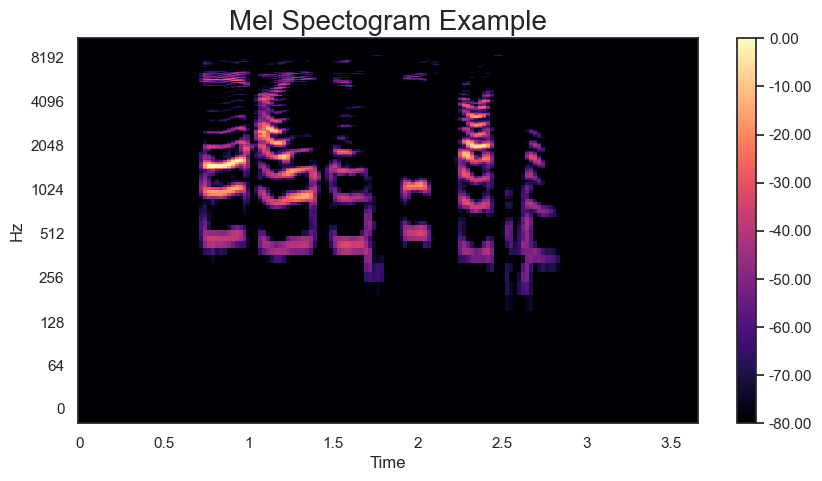

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

img = librosa.display.specshow(S_db_mel,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()